In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this Jupyter notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

![title](figs/COMPGEOP_TITLE.jpg)

# Chapter 6: Ordinary Differential Equations

## Introduction
Ordinary differential equations (ODEs) and partial differential equations (PDEs) play a central role in modeling physical problems. Although some ODEs can be solved analytically, in most practical cases ODEs **cannot** be solved analytically or the solutions are very difficult. Thanks for the development of modern computing technology, most of ODEs can be solved or approximated by numerical methods, which will be covered in this chapter. 

We will mainly focus on solving first-order ODEs, which is the foundation to solve high-order ODEs and coupled ODEs, which we will briefly introduce at the end of this chapter. 

First-order ODEs has the form of 
$$
y' = f(x,y), \ \ \ y(x_0)=y_0
$$
where $x_0$ and $y_0$ are initial value of the problem and are given. We also assume that the problem has a unique solution on some open interval $a < x < b$ containing $x_0$. 

The methods we use in this section are **step-by-step methods**, which compute approximate numeric values of the solution $y_n = y(x_n)$ at the equidistant points on the x-axis
$$
x_1 = x_0 + h, \ \ \ 
x_2 = x_0 + 2h, \ \ \
x_2 = x_0 + 3h, \ \ \
... \ \ \ 
$$
where the **step size** $h$ is a fixed number, for instance, 0.1 or 0.05 or 0.01. How to choose $h$ and the associated error will be discussed later as well. 

## Euler Method

Let's remind ourselves again on the Taylor series:
$$
y(x+h) = y(x) + hy'(x) + \frac{h^2}{2} y''(x)\  + \  ...
$$
if we approximate the Taylor series only using the first term, 
and substitute the equation we try to solve:
$$
y(x+h) \approx y(x) + h y'(x)
 = y(x) + hf(x,y).
$$
This gives us **Euler method**:
$$
y_{n+1} = y_n + hf(x_n, y_n)
$$

### Python example
Let's solve a simple problem $y'=x+y$, with initial condition $x_0=0, y_0=0$. 
This problem has an analytical solution as $y=e^x-x-1$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
def euler_int(fun,y0,a,b,N):
    ''' Function uses Euler method to calculate ODE y' = fun(x,y)
    usage: y = euler_int(fun,y0,a,b,N)
    input: 
        fun: function of ODE y'=fun(x,y)
        y0: initial value of y at a
        a: starting value
        b: ending value
        N: number of grid
    output:
        value of x and y between a and b
    written by Ge Jin, gjin@mines.edu, 06/2019
    '''
    h = (b-a)/N;
    x = a+h*np.arange(N+1)
    y = np.zeros(N+1)
    y[0] = y0
    for i in range(1,N+1):
        y[i] = y[i-1] + h*f(x[i-1],y[i-1])
    return x,y

<IPython.core.display.Javascript object>


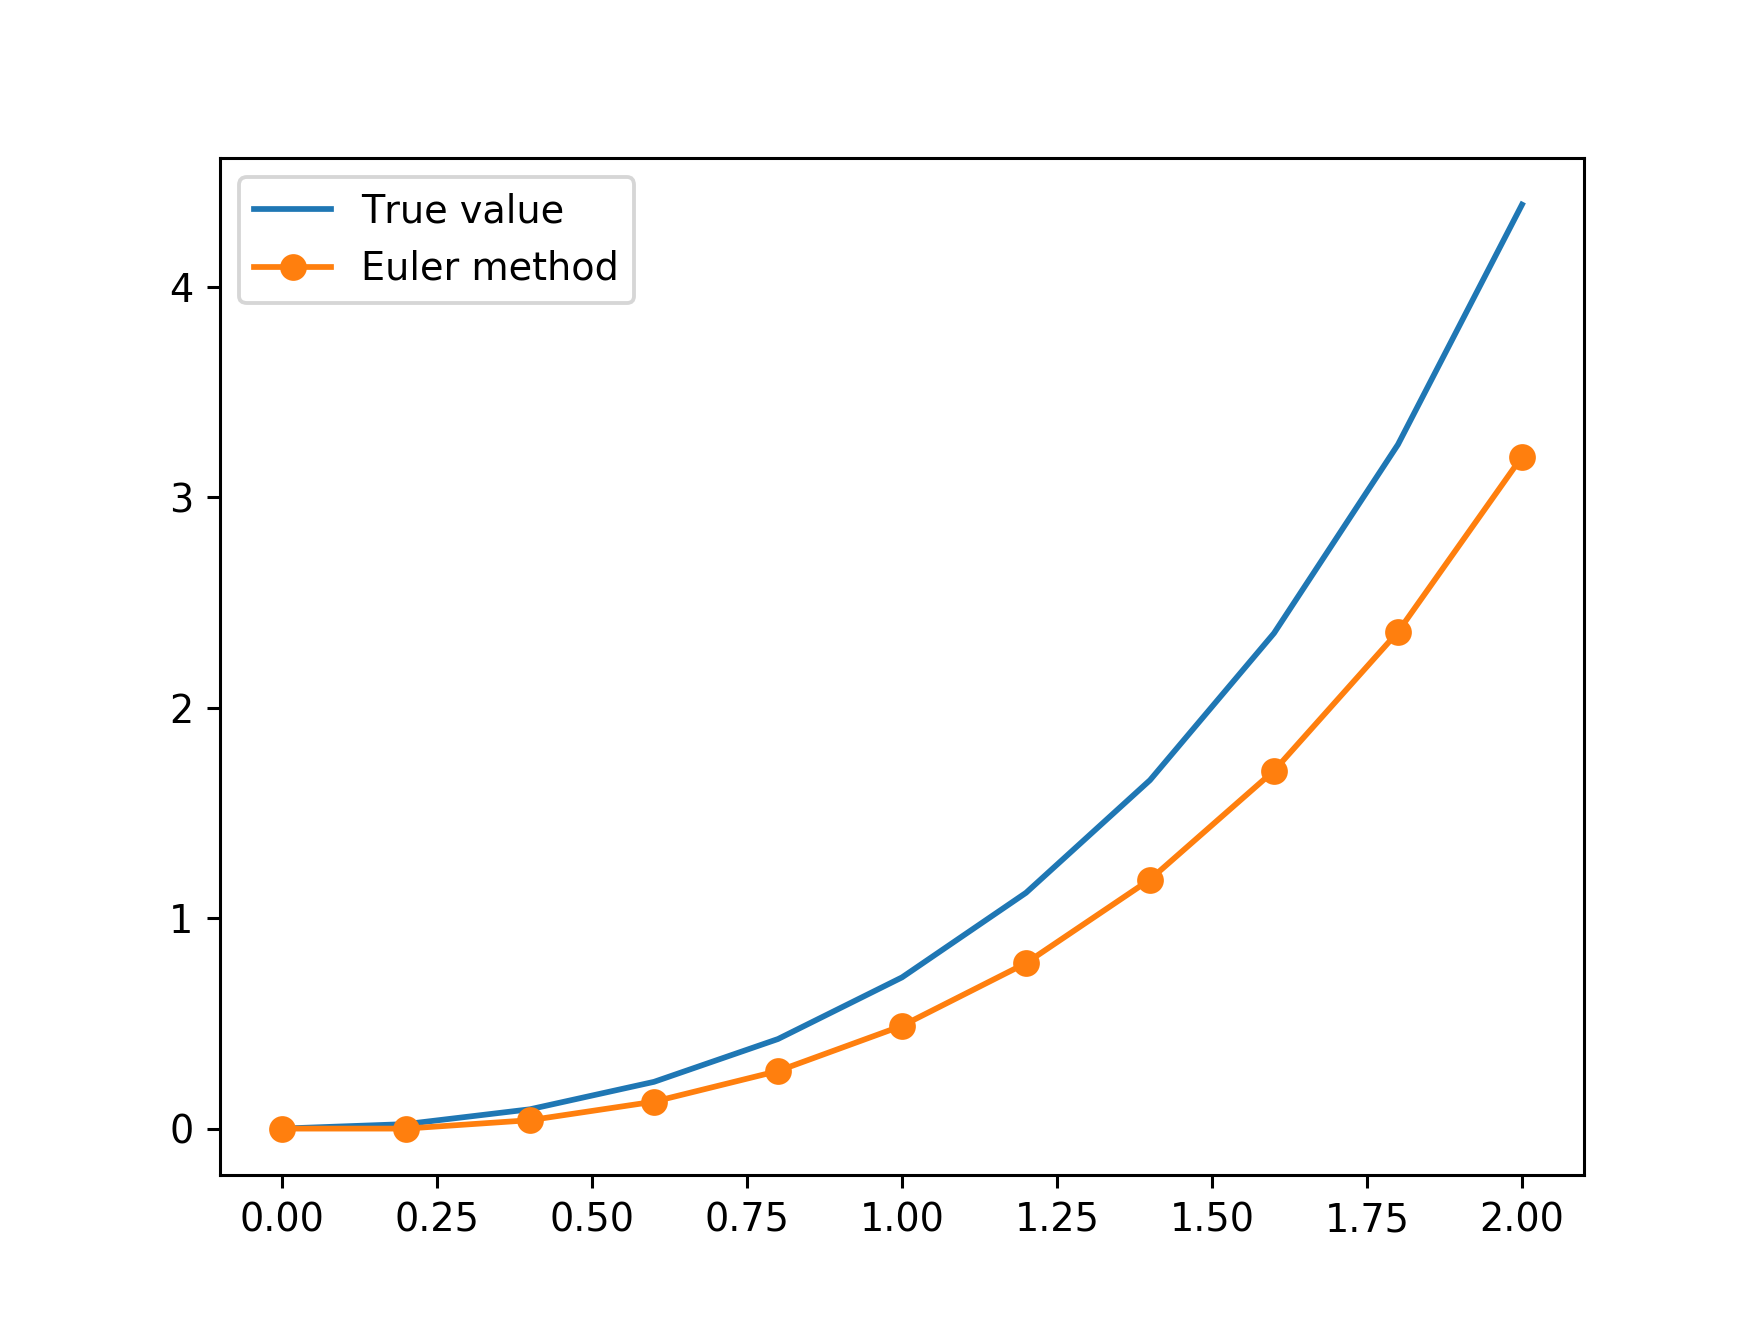

In [25]:

# define the ODE y' = f
f = lambda x,y: x+y

# define range and step number to calculate step size
# try different N and see how the error changes
a = 0; b = 2;
N = 10;
y0 = 0;

# apply Euler method
x,y_euler = euler_int(f,y0,a,b,N)

# calculate the true value (analytical solution)
y_ana = np.exp(x)-x-1

# make the plot and compare:
plt.figure()
plt.plot(x,y_ana,label='True value')
plt.plot(x,y_euler,'-o',label='Euler method')
plt.legend()
plt.show()

### Error of the Euler Method
As seen in the python example, Euler method is quite inaccurate. From Taylor's formula, we can estimate its error as:
$$
y(x+h) = y(x) + hy'(x) + \frac{1}{2} h^2 y''(\xi)
$$
where $\xi$ is an unknown value between $x$ and $x+h$. Keep in mind that this is the error of each step, which is called **local truncatoin error**, and is proportional to $h^2$, written $O(h^2)$, where $O$ suggests order. Because the number of steps is proportional to $1/h$, the total error or **global error** is proportional to $h^2(1/h)=h^1$. We can see that Euler method is called a **first-order method**.

### Adaptive Step Size Selection
Euler method does not require the step size to be constant, which gives the opportunity to model softwares to automatically change the step size $h$ based on the function $f$ and a given tolerance $TOL$.

According to the error estimate, the error of $n^{th}$ step with step size $h_n$ can be presented as:
$$
\varepsilon = \frac{1}{2} h^2 y''(\xi)
$$
having $|\varepsilon|=TOL$, we get
$$
\frac{1}{2} h^2 |y''(\xi)| = TOL, \ \ \ \ \ h_n = \sqrt{\frac{2TOL}{|y''(\xi)|}}
$$
and 
$$
y''(\xi) \approx y''(x_{n},y_{n}) = f'(x_{n},y_{n}) = f_x(x_{n},y_{n})+f_y(x_{n},y_{n})f(x_{n},y_{n})
$$


## Improved Euler Method
From previous python example we can see Euler method is quite inaccurate: decrease the step size by half, the error only decrease by half. One way to increase accuracy is to include more terms in Taylor series. However, because $f$ is a function of both $x$ and $y$, higher order derivative of $f$ is difficult to calculate. The **general strategy** now is to avoid the computation of these derivatives and to replace it by computing $f$ for one or several suitably chosen auxiliary values of $(x,y)$. 

In each step of the **improved Euler method** we compute two values, first the **predictor**
$$
y^*_{n+1} = y_n + hf(x_n,y_n),
$$
, and then the **corrector**:
$$
y_{n+1} = y_n + \frac{1}{2}h \left[
f(x_n,y_n) + f(x_{n+1},y^*_{n+1})
\right]
$$
Hence the improved Euler method is a predictor-corrector method: in each step we predict a value and then correct it.

### Python Example

In [4]:
import numpy as np
def improve_euler_int(fun,y0,a,b,N):
    ''' Function uses Euler method to calculate ODE y' = fun(x,y)
    usage: y = euler_int(fun,y0,a,b,N)
    input: 
        fun: function of ODE y'=fun(x,y)
        y0: initial value of y at a
        a: starting value
        b: ending value
        N: number of grid
    output:
        value of x and y between a and b
    written by Ge Jin, gjin@mines.edu, 06/2019
    '''
    h = (b-a)/N;
    x = a+h*np.arange(N+1)
    y = np.zeros(N+1)
    y[0] = y0
    for i in range(1,N+1):
        yp = y[i-1] + h*f(x[i-1],y[i-1])
        y[i] = y[i-1] + h/2*(f(x[i-1],y[i-1])+f(x[i],yp))
    return x,y

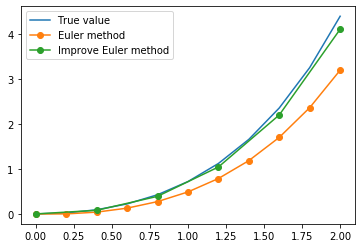

In [5]:

# define the ODE y' = f
f = lambda x,y: x+y

# define range and step number to calculate step size
# try different N and see how the error changes
a = 0; b = 2;
N = 10;
y0 = 0;

# apply Euler method
x,y_euler = euler_int(f,y0,a,b,N)
# apply Improved Euler method, with the same function evaluation time as Euler method
x_imp,y_imp= improve_euler_int(f,y0,a,b,N//2)

# calculate the true value (analytical solution)
y_ana = np.exp(x)-x-1

# make the plot and compare:
plt.figure()
plt.plot(x,y_ana,label='True value')
plt.plot(x,y_euler,'-o',label='Euler method')
plt.plot(x_imp,y_imp,'-o',label='Improve Euler method')
plt.legend()
plt.show()

### Error of the Improved Euler Method
From the python example we can see that even with the same number of function evaluation times, improved Euler method provides much higher precision than the Euler method. This is due to improved Euler method is a **second-order method**. 

Setting $\tilde{f_n} = f(x_n,y(x_n))$, and from Taylor series
$$
y(x_n+h) - y(x_n) = h \tilde{f_n} + \frac{1}{2}h^2 \tilde{f'_n} 
+ \frac{1}{6}h^3 \tilde{f''_n} + \dots
$$
Using improved Euler method, we have
$$
\begin{align}
y_{n+1} - y_n &\approx \frac{1}{2}h\left[ \tilde{f_n} + \tilde{f_n}_{+1} \right] \\
&= \frac{1}{2}h \left[\tilde{f_n} + ( \tilde{f_n} + h \tilde{f'_n} + \frac{1}{2}h^2 \tilde{f''_n} + \dots )\right] \\
&= h \tilde{f_n} + \frac{1}{2}h^2 \tilde{f'_n} 
+ \frac{1}{4}h^3 \tilde{f''_n} + \dots
\end{align}
$$
and the difference between the approximation and Taylor series is
$$
 \frac{1}{6}h^3 \tilde{f''_n} 
- \frac{1}{4}h^3 \tilde{f''_n} + \dots = 
 -\frac{1}{12}h^3 \tilde{f''_n} 
$$
so that the method is of second order. 

It worth noting that improved Euler method approximate $\tilde{f_n}_{+1}$ using $f(x_{n+1},y^*_{n+1})$. 
From Euler method error estimation we know $y_{n+1} = y^*_{n+1} + O(h^2)$, so 
$
\tilde{f_n}_{+1} - f(x_{n+1},y^*_{n+1}) \sim O(h^3),
$
hence does not affect the order of the error.


## Runge-Kutta Methods (RK Methods)

A method of great practical importance and much greater accuracy than that of the improved Euler method is the **classical Runge-Kutta method of fourth order**, which we call briefly **RK method**. For this method, in each step we first compute four auxiliary quantities $k_1, k_2, k_3, k_4$ and then the new value $y_{n+1}$. As already indicated by the name, RK method is a fourth-order method with local error $O(h^5)$ and global error $O(h^4)$.

For each step with size $h$, we have
$$
\begin{align}
&k_1 = hf(x_n,y_n) \\
&k_2 = hf(x_n + \frac{1}{2}h,y_n + \frac{1}{2}k_1) \\
&k_3 = hf(x_n + \frac{1}{2}h,y_n + \frac{1}{2}k_2) \\
&k_4 = hf(x_n + h,y_n + k_3) \\
&x_{n+1} = x_n + h \\
&y_{n+1} = y_n + \frac{1}{6}( k_1 + 2k_2 + 2k_3 +k_4)
\end{align}
$$

In [6]:
def RK_int(fun,y0,a,b,N):
    ''' Function uses RK method to calculate ODE y' = fun(x,y)
    usage: y = RK_int(fun,y0,a,b,N)
    input: 
        fun: function of ODE y'=fun(x,y)
        y0: initial value of y at a
        a: starting value
        b: ending value
        N: number of grid
    output:
        value of x and y between a and b
    written by Ge Jin, gjin@mines.edu, 09/2019
    '''
    h = (b-a)/N;
    x = a+h*np.arange(N+1)
    y = np.zeros(N+1)
    y[0] = y0
    for i in range(0,N):
        k1 = h*f(x[i],y[i])
        k2 = h*f(x[i]+0.5*h,y[i]+0.5*k1)
        k3 = h*f(x[i]+0.5*h,y[i]+0.5*k2)
        k4 = h*f(x[i]+h,y[i]+k3)
        y[i+1] = y[i] + 1/6*(k1+2*k2+2*k3+k4)
    return x,y

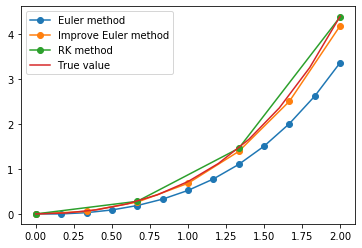

In [7]:

# define the ODE y' = f
f = lambda x,y: x+y

# define range and step number to calculate step size
# try different N and see how the error changes
a = 0; b = 2;
N = 12;
y0 = 0;

# apply Euler method
x_euler,y_euler = euler_int(f,y0,a,b,N)
# apply Improved Euler method, with the same function evaluation time as Euler method
x_imp,y_imp= improve_euler_int(f,y0,a,b,N//2)
# apply RK method
x_RK,y_RK = RK_int(f,y0,a,b,N//4)

# calculate the true value (analytical solution)
y_ana = np.exp(x)-x-1

# make the plot and compare:
plt.figure()
plt.plot(x_euler,y_euler,'-o',label='Euler method')
plt.plot(x_imp,y_imp,'-o',label='Improve Euler method')
plt.plot(x_RK,y_RK,'-o',label='RK method')
plt.plot(x,y_ana,label='True value')
plt.legend()
plt.show()

## Backward Euler Method: Implicit Method

All the previous methods (Euler, Improved Euler, and RK methods) are all **explicit methods**, which means the current function value is only determined by the values from the time steps before the current time. **Implicit method** cannot calculate directly from previous time steps, thus is usually more complicated to calculate. However, implicit method also guarantees a stable solution, where explicit methods may fail at large step size.  


The backward Euler formula can be presented as
$$
y_{n+1} = y_{n} + hf(x_{n+1},y_{n+1}) \ \ \ \ \ (n=0,1,2,\dots)
$$

An example of the benefit of implicit method is to calculate the initial value problem
$$
y' = f(x,y) = -20y + 20x^2 + 2x, \ \ \ y(0) = 1
$$
which has the solution
$$
y = e^{-20x} + x^2
$$
The backward Euler formula is
$$
y_{n+1} = y_n + hf(x_{n+1},y_{n+1}) = y_n + h(-20 y_{n+1} + 20 x^2_{n+1} + 2x_{n+1})
$$
Noting that x_{n+1} = x_n + h, taking the term -20y_{n+1} to the left, and dividing, we obtain
$$
y_{n+1} = \frac{y_n + h[20(x_n+h)^2 + 2(x_n+h)]}{1+20h}
$$

<IPython.core.display.Javascript object>


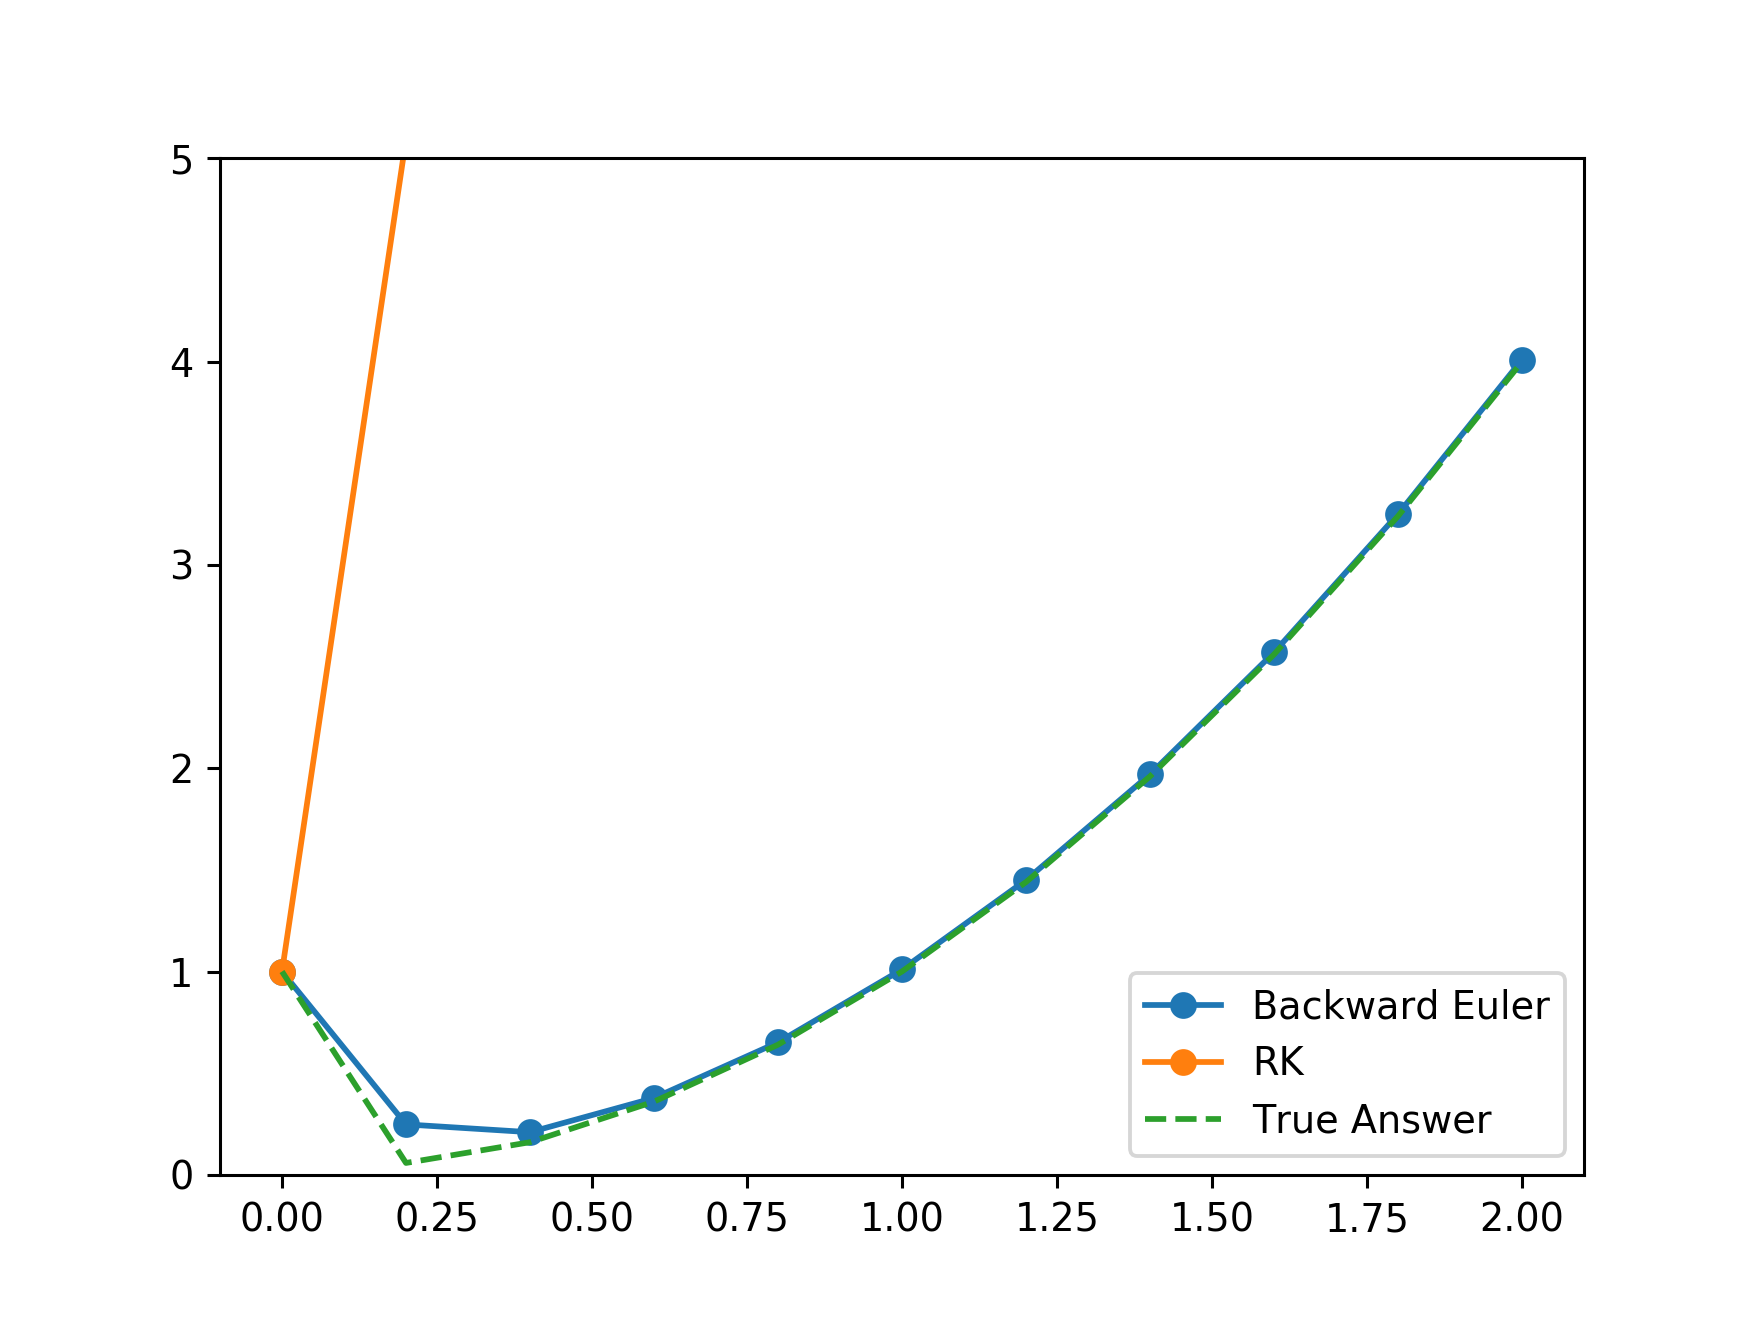

In [29]:

# define the ODE y' = f
f = lambda x,y: -20.0*y + 20.0*x**2+2.0*x

# define range and step number to calculate step size
# try different N and see how the error changes
a = 0.0; b = 2.0;
N = 10;
y0 = 1.0;

# Calculate using backward Euler
h = (b-a)/N;
x = a+h*np.arange(N+1)
y = np.zeros(N+1)
y[0] = 1
for i in range(N):
    y[i+1] = (y[i]+h*(20*x[i+1]**2+2*x[i+1]))/(1+20*h)

# Calculate using RK method
x_RK,y_RK = RK_int(f,y0,a,b,N)

# calculate true value
y_true = np.exp(-20*x) + x**2

plt.figure()
plt.plot(x,y,'-o',label='Backward Euler')
plt.plot(x_RK,y_RK,'-o',label='RK')
plt.plot(x,y_true,'--',label='True Answer')
plt.ylim([0,5])
plt.legend()
plt.show()

## Multistep Methods

All previous methods are **one-step** method where we compute $y_{n+1}$ using only a single step. One-step methods are **"self-starting"**, they need no help to get going because they obtain $y_1$ from the initial value $y_0$.

In contrast, a **multistep method** uses values from two or more previous steps. These methods are motivated by the expectation that the additional information will increase accuracy and stability. But to get started, one needs values for several time steps initially, which can be obtained by RK or other methods. 

### Adams-Bashforth Methods
We consider an initial value problem
$$
y' = f(x,y), \ \ \ y(x_0) = y_0
$$
By integrating $y'=f(x,y)$ from $x_n$ to $x_{n+1} = x_n + h$, we have
$$
\int_{x_n}^{x_{n+1}} y'(x)dx = y(x_{n+1})-y(x_n)
=\int_{x_n}^{x_{n+1}} f(x,y(x))dx
$$
If we approximate $f(x,y(x))$ in this section using an interpolation polynomial $p(x)$, so that we can later integrate. 
$$
y_{n+1} = y_n + \int_{x_n}^{x_{n+1}} p(x)dx
$$
Different choices of $p(x)$ will now produce different methods. Let's take cubic polynomial $p_3(x)$ as an example. 

The data points required to construct $p_3(x)$ are
$$
\begin{align}
f_n &= f(x_n,y_n) \\
f_{n-1} &= f(x_{n-1},y_{n-1}) \\
f_{n-2} &= f(x_{n-2},y_{n-2}) \\
f_{n-3} &= f(x_{n-3},y_{n-3})
\end{align}
$$

We can obtain $p_3(x)$ from Newton's backward difference formula:
$$
p_3(x) = f_n + rf'_n + \frac{1}{2}r(r+1)f''_n 
+ \frac{1}{6}r (r+1) (r+2) f'''_n
$$
where $r=(x-x_n)/h$. Because $x = x_n +hr$, we have $dx = hdr$. We thus obtain
$$
\int_{x_n}^{x_{n+1}}p_3 dx = h \int_0^1 p_3 dr 
= h \left(
f_n + \frac{1}{2} f'_n + \frac{5}{12} f''n + \frac{3}{8} f'''n
\right)
$$

From the finite difference estimation (covered by later lecture), we have
$$
\begin{align}
f'_n &= f_n - f_{n-1} \\
f''_n &= f_n - 2f_{n-1} + f_{n-2} \\
f'''_n &= f_n - 3f_{n-1} + 3f_{n-2} - f_{n-3}
\end{align}
$$
By substitute this into the integration formula and collect terms, this give the multistep formula of the **Adams-Bashforth method** of fourth order
$$
y_{n+1} = y_n + \frac{h}{24} \left(
55f_n - 59f_{n-1} + 37 f_{n-2} - 9 f_{n-3}
\right)
$$

## Methods for Systems and Higher Order ODEs

Initial value problems for first-order systems of ODEs are of the form
$$
\bar{y}' = \bar{f}(x,\bar{y})
$$
where $\bar{y}$ and $\bar{f}$ are variables and functions in a vector form. The expansion of the systems can be written as:
$$
y_1' = f_1(x,y_1,...,y_m), \ \ \ \ \ y_1(x_0) = y_{10} \\
y_2' = f_2(x,y_1,...,y_m), \ \ \ \ \ y_2(x_0) = y_{10} \\
\dots \dots\dots\dots\dots\dots  \\
y_m' = f_m(x,y_1,...,y_m), \ \ \ \ \ y_m(x_0) = y_{10}
$$

It is important to note that higher-order ODEs can be solved in the same fashion, by setting
$$
y_1 = y,\ \ y_2 = y',\ \ y_3=y'',\ \ ...,y_m=y^{(m-1)}
$$
now we have
$$
\begin{align}
y_1' &= f_1(x,y_1,...,y_m) = y_2,\\
y_2' &= f_2(x,y_1,...,y_m) = y_3,\\
&\dots \dots\dots\dots\dots\dots  \\
y_{m-1}' &= f_m(x,y_1,...,y_m) = y_m,  \\
y_m' &= f(x,y_1,...,y_m)
\end{align}
$$
with the initial condition $y_1(x_0)=K_1$, $y_2(x_0)=K_2$, ..., $y_m(x_0)=K_m$.

### Euler Method for Systems
Let's solve a simple string vibration problem by having:
$$
y'' + y = 0, \ \ \ y(0) = 1, \ \ \ y'(0) = 0
$$
The equation has the analytical solution as
$$
y = sin(x+\frac{\pi}{2})
$$

To solve this problem, we have $y_1 = y$, $y_2 = y'$, and the equation can be presented as
$$
y_1' = y_2 \\
y_2' = -y_1
$$
With a step size $h$, we can write this equation system in vector form as
$$
\begin{bmatrix}
y_{1,n+1}\\y_{2,n+1}
\end{bmatrix}  =
\begin{bmatrix}
y_{1,n}\\y_{2,n}
\end{bmatrix}  +
h\begin{bmatrix}
f_{1}\\f_{2}
\end{bmatrix}=
\begin{bmatrix}
y_{1,n}\\y_{2,n}
\end{bmatrix}  +
h\begin{bmatrix}
y_{2,n}\\-y_{1,n}
\end{bmatrix}
$$

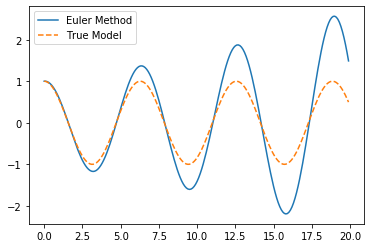

In [9]:
# python program to perform higher order ODE using Euler method

# set up model parameters
a = 0.0; b = 20.0;
N = 200
h = (b-a)/N
y1 = np.zeros(N)
y2 = np.zeros(N)
x = a + np.arange(N)*h

# set up initial condition
y1[0] = 1
y2[0] = 0

# set up ODE function array
f1 = lambda x,y:y[1]
f2 = lambda x,y:-y[0]
def f_bar(x,y):
    return np.array([f1(x,y),f2(x,y)])

# Perform Euler method
for i in range(0,N-1):
    yn = np.array([y1[i],y2[i]])
    xn = x[i]
    ynp1 = yn + h*f_bar(xn,yn)
    y1[i+1] = ynp1[0]
    y2[i+1] = ynp1[1]

# plot the solution:
y_true = np.sin(x+np.pi/2)
y_euler = y1.copy()
x_euler = x.copy()
plt.figure()
plt.plot(x_euler,y_euler,label='Euler Method')
plt.plot(x,y_true,'--',label='True Model')
plt.legend()
plt.show()

### Runge-Kutta Methods for Systems

Similar to Euler methods, we obtain RK methods for an initial value problem simply by writing vector formulas for vectors with $m$ components. If $m=1$, the formulas reduce to previous scalar ones.

For the classical **RK method** of fourth order, we obtain
$$
\bar{y}(x_0) = \bar{y}_0
$$
and for each step, we obtain the 4 auxiliary quantities
$$
\begin{align}
\bar{k}_1 & = h\bar{f}(x_n,\bar{y}_n) \\
\bar{k}_2 & = h\bar{f}(x_n+\frac{1}{2}h,\bar{y}_n+\frac{1}{2}\bar{k}_1) \\
\bar{k}_3 & = h\bar{f}(x_n+\frac{1}{2}h,\bar{y}_n+\frac{1}{2}\bar{k}_2) \\
\bar{k}_4 & = h\bar{f}(x_n+h,\bar{y}_n+\bar{k}_3)
\end{align}
$$
and the new value would be
$$
\bar{y}_{n+1} = \bar{y}_n + \frac{1}{6}(\bar{k}_1 + 2\bar{k}_2+ 2\bar{k}_3+ \bar{k}_4)
$$

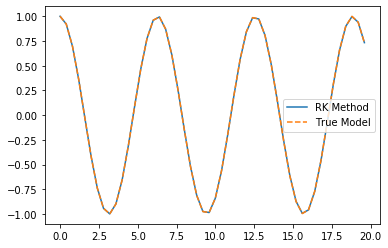

In [10]:
# python program to perform higher order ODE using RK method

# set up model parameters
a = 0.0; b = 20.0;
N = 50
h = (b-a)/N
y1 = np.zeros(N)
y2 = np.zeros(N)
x = a + np.arange(N)*h

# set up initial condition
y1[0] = 1.0
y2[0] = 0.0

# set up ODE function array
f1 = lambda x,y:y[1]
f2 = lambda x,y:-y[0]
def f_bar(x,y):
    return np.array([f1(x,y),f2(x,y)])

# Perform RK method
for i in range(0,N-1):
    yn = np.array([y1[i],y2[i]])
    xn = x[i]
    k1 = h*f_bar(xn,yn)
    k2 = h*f_bar(xn+h/2,yn+k1/2)
    k3 = h*f_bar(xn+h/2,yn+k2/2)
    k4 = h*f_bar(xn+h,yn+k3)
    ynp1 = yn + 1/6*(k1+2*k2+2*k3+k4)
    y1[i+1] = ynp1[0]
    y2[i+1] = ynp1[1]

# plot the solution:
x_true = a + np.arange(N)*h
y_true = np.sin(x+np.pi/2)
y_RK = y1.copy()
x_RK = x.copy()
plt.figure()
plt.plot(x_RK,y_RK,label='RK Method')
plt.plot(x_true,y_true,'--',label='True Model')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


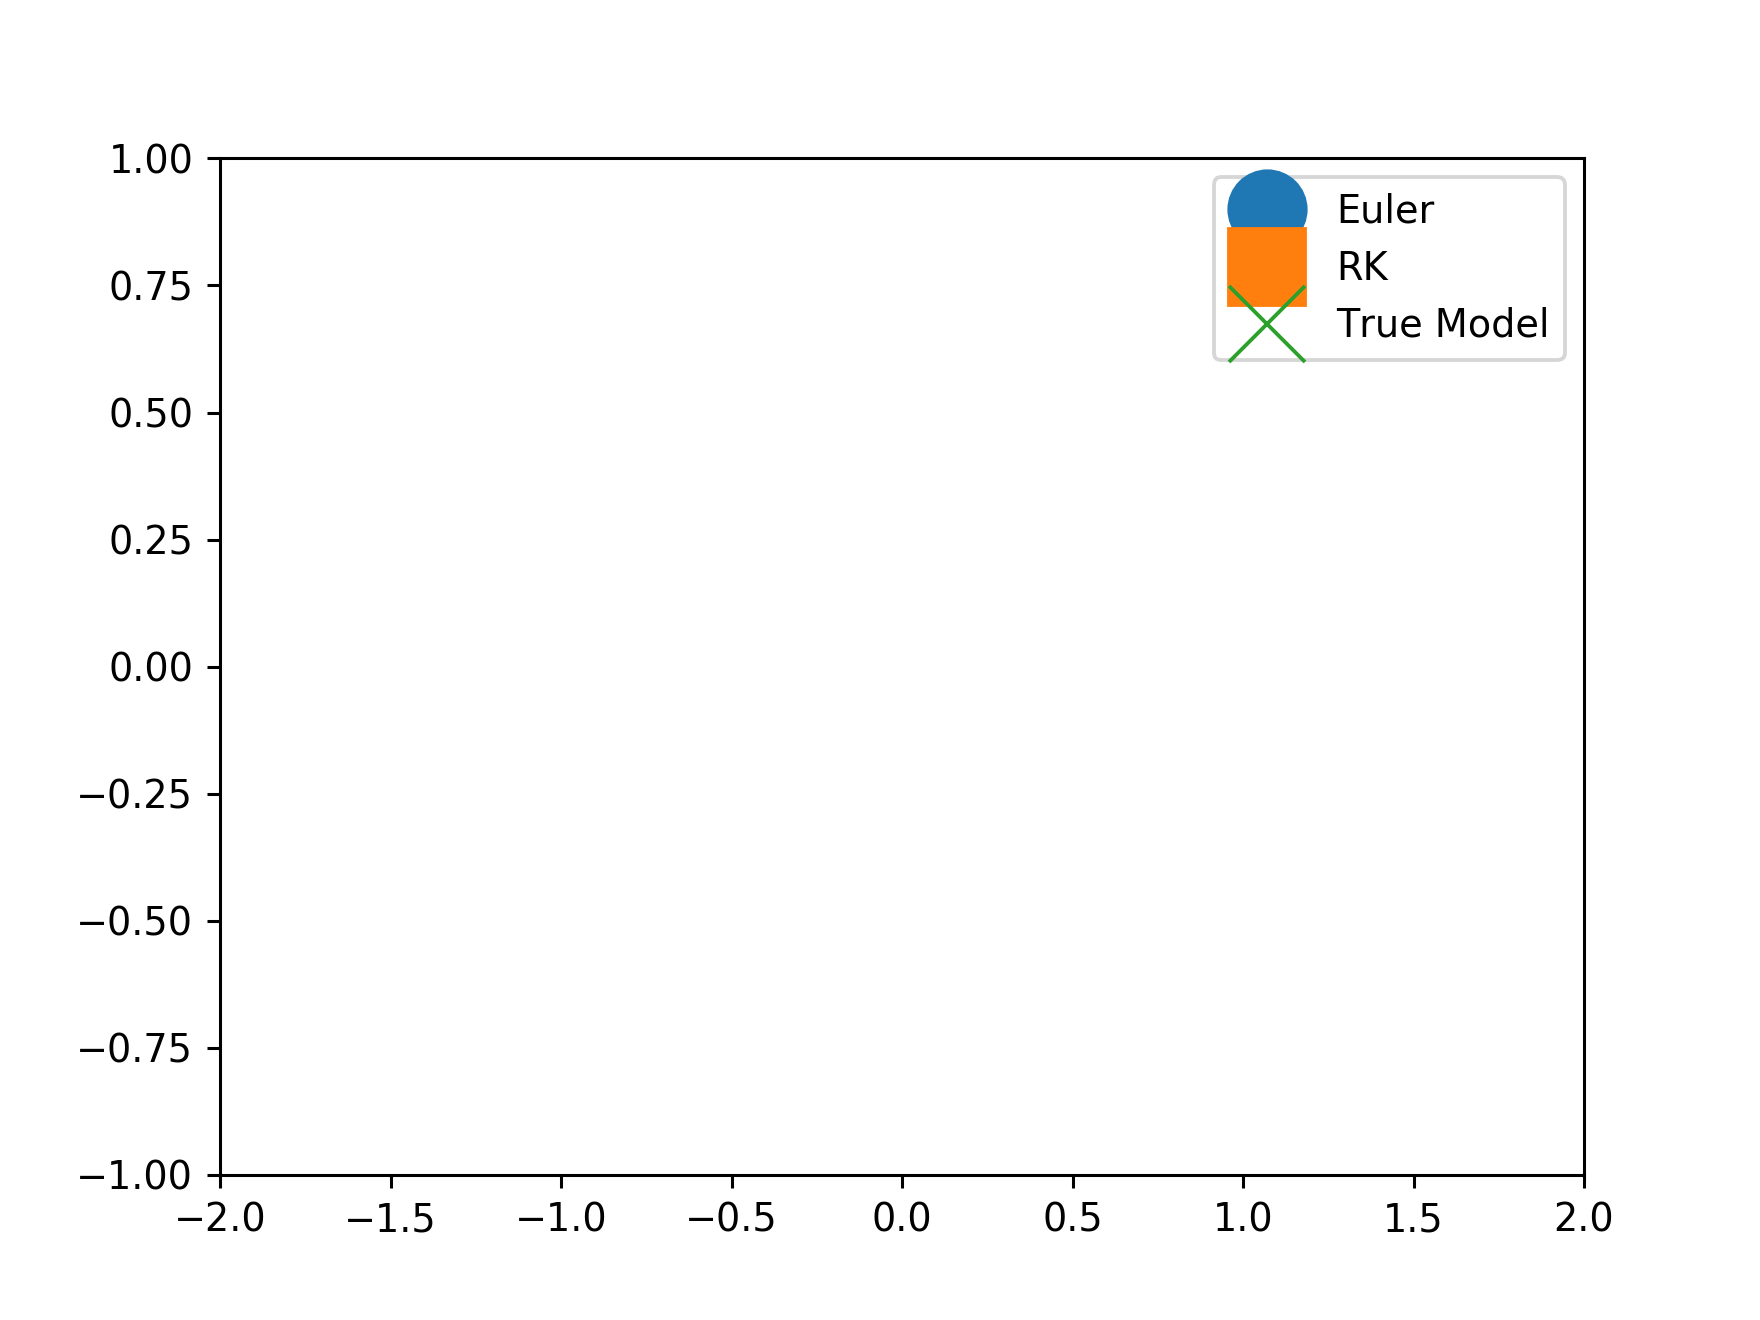

In [31]:
import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib notebook
%matplotlib notebook

fig = plt.figure()
ax = plt.axes(xlim=[-2,2],ylim=[-1,1])
euler_p, = ax.plot([],[],'o',markersize=20,label='Euler')
RK_p, = ax.plot([],[],'s',markersize=20,label='RK')
true_p, = ax.plot([],[],'x',markersize=20,label='True Model')
plt.legend()

# animation function.  This is called sequentially
def animate(i):
    x = i/100.0
    y = np.interp(x,x_true,y_true)
    true_p.set_data(y,0)
    y = np.interp(x,x_euler,y_euler)
    euler_p.set_data(y,0)
    y = np.interp(x,x_RK,y_RK)
    RK_p.set_data(y,0)
    return true_p,euler_p,RK_p

anim = animation.FuncAnimation(fig, animate, frames=2000, interval=1, blit=True)

plt.show()

# Acknowledgement

Most of this teaching material is based on:

Kreyszig, E., 2018. Advanced Engineering Mathematics, 10-th edition.